[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/brunomssmelo/NLP_com_Deep_Learning/blob/master/notebooks/Metodos_classicos_de_vetorizacao_de_palavras_e_documentos.ipynb)

## Métodos clássicos de vetorização de palavras e documentos

### A representação do tipo *One-Hot*

Trata-se de um tipo de representação *esparsa* em que todas as observações (documentos) presentes no conjunto de dados 
de treinamento (*corpus*) são *tokenizados*, normalmente a nível de palavras, com o objetivo de se obter um 
*vocabulário*.
 
Uma vez definido o vocabulário, cada palavra de um documento pode ser representada por um vetor em que cada uma de suas 
posições corresponde a uma palavra do vocabulário. Todas as posições deste vetor estarão "frias" (terão valor 0) com 
exceção da posição correspondente à palavra que se está representando, que estará "quente" (terá valor 1).

#### Exemplo
Suponhamos que nossa base de dados seja composta de duas observações (documentos):

```python
doc1 = "manutenção de ar condicionado"
doc2 = "aquisição de peças de ar condicionado"
```

Partindo desse *corpus* chega-se ao seguinte vocabulário: `{manutenção, de, ar, condicionado, aquisição, peças}`, a 
partir do qual será possível codificar cada palavra por sua respectiva representação vetorial `one-hot`, de 6 dimensões 
(tamanho do vocabulário).

Neste caso, cada documento seria representado por um conjunto de vetores correspondente à quantidade de palavras nele 
contido. Alternativamente, podemos encarar o conjunto de vetores que representa um documento como uma matriz de 
dimensões $p \times v$ (onde $p$&nbsp;=&nbsp;n° de palavras no documento, e $v$&nbsp;=&nbsp;n° de palavras no vocabulário):  

|$doc_1:$| manutenção | de | ar | condicionado | aquisição | peças |
|:-------|:----------:|:--:|:--:|:------------:|:---------:|:-----:|
|$1_{manutencao}$| 1 | 0 | 0 | 0 | 0 | 0 |
|$1_{de}$| 0 | 1 | 0 | 0 | 0 | 0 |
|$1_{ar}$| 0 | 0 | 1 | 0 | 0 | 0 |
|$1_{condicionado}$| 0 | 0 | 0 | 1 | 0 | 0 |

<br>

|$doc_2:$| manutenção | de | ar | condicionado | aquisição | peças |
|:-------|:----------:|:--:|:--:|:------------:|:---------:|:-----:|
|$1_{aquisicao}$| 0 | 0 | 0 | 0 | 1 | 0 |
|$1_{de}$| 0 | 1 | 0 | 0 | 0 | 0 |
|$1_{pecas}$| 0 | 0 | 0 | 0 | 0 | 1 |
|$1_{de}$| 0 | 1 | 0 | 0 | 0 | 0 |
|$1_{ar}$| 0 | 0 | 1 | 0 | 0 | 0 |
|$1_{condicionado}$| 0 | 0 | 0 | 1 | 0 | 0 |

<br>

<br>

> **nota**: usamos uma notação frequentemente utilizada na literatura para indicarmos o uso da representação
> *one-hot*: $1_p$, onde $p$ corresponde à palavra sendo representada.

<br>

Ao invés de se representar cada documento por um conjunto de vetores ou matriz, é comum utilizar-se de uma representação 
em que um único vetor que condensa a informação da presença ou ausência das palavras do vocabulário no documento. 

|&nbsp;| manutenção | de | ar | condicionado | aquisição | peças |
|:--:|:----------:|:--:|:--:|:------------:|:---------:|:-----:|
|$1_{doc_1}$:| 1 | 1 | 1 | 1 | 0 | 0 |
|$1_{doc_2}$:| 0 | 1 | 1 | 1 | 1 | 1 |

<br>

> **nota**: neste tipo de representação, perde-se a informação relativa à ordem em que as palavras posicionam-se no 
> documento bem como a quantidade de vezes que aparecem.

<br>

No exemplo acima, em que tínhamos um *Corpus* de apenas 2 documentos, é fácil obter manualmente o vocabulário e gerar as 
representações do tipo *one-hot*. No entanto, em bases de dados reais, a quantidade e o tamanho dos documentos são bem
maiores e torna-se necessário utilizar ferramentas mais apropriadas.

A seguir fornecemos um exemplo de como poderíamos gerar os vetores $1_{doc_1}$ e $1_{doc_2}$ com a biblioteca de 
aprendizagem de máquina [scikit-learn](https://scikit-learn.org/stable/):

<br>

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

corpus = ["manutenção de ar condicionado",          # doc1
          "aquisição de peças de ar condicionado"]  # doc2

##########################################################################################################
#  Utilização da biblioteca Scikit-Learn para codificar os documentos do corpus na representação one-hot #
##########################################################################################################

one_hot_vectorizer = CountVectorizer(binary=True)   # Instanciação de um objeto da classe CountVectorizer.
                                                    # Repare que ele foi parametrizado para realizar uma 
                                                    # contagem binária das palavras por documento: assim,
                                                    # irá indicar a presença (1) ou ausência (0) dos 
                                                    # termos (palavras) do vocabulário em cada documento.

one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()  # O método fit_transform() recebe o corpus, 
                                                              # quebra os documentos em palavras, extrai 
                                                              # o vocabulário da base e retorna a 
                                                              # representação vetorizada de cada doc.
                                                              # Por fim, o método to_array irá converter
                                                              # a matriz esparsa retornada pelo método
                                                              # fit_transform() num array bidimensional
                                                              # do numpy em que as linhas correspondem
                                                              # aos documentos e as colunas às palavras
                                                              # do vocabulário.
                                                               
vocab = one_hot_vectorizer.get_feature_names()  # O método get_feature_names() acessa o vocabulário 
                                                # produzido quando da chamada ao método fit_transform().

##########################################################################################################                                                
# Utilização da biblioteca seaborn para gerar uma visualização, sob a forma de um mapa de calor, da      #
# vetorização produzida para cada documento do corpus                                                    #
##########################################################################################################

num_docs = one_hot.shape[0] # Obtém a quantidade de documentos no corpus

str_tipo = '1'  # String que indica o tipo de vetorização utilizada 
                # (neste caso 1 representa o método 1-hot)

# Cria um vetor de strings contendo os rótulos a serem utilizados para identificar a representação
# vetorial associada a cada documento do corpus.
# Observe que trata-se de um string latex em modo 'math' (delimitada por '$').
str_docs = ['$' + str_tipo +'_{doc' + str(id) + '}$' for id in range(1, num_docs+1)]

# Confecção do gráfico
plt.figure(figsize=(12, num_docs))     # define a largura (fixa de 12 polegadas) e a altura (proporcional
                                       # à quantidade de vetores sendo exibidos).

sns.set(font_scale=1.8)                # define um aumento de escala da ordem de 80% em relação ao valor 
                                       # padrão da fonte utilizada nos eixos do gráfico.

sns.heatmap(one_hot, 
            annot=True,                # garante a exibição do conteúdo dos vetores em cada célula 
            cbar=False,                # para não exibir uma legenda do tipo 'color bar'
            xticklabels=vocab,         # define as palavras do vocabulário como legendas do eixo horiz.
            yticklabels=str_docs,      # define os rótulos dos documewntos como legendas do eixo vert.
            cmap="Blues",              # utiliza um 'color map' azul para produzir o mapa de calor
            annot_kws={'fontsize':18}) # define o tamanho da fonte do interior das células

Percebam que a parte final do código acima, que utiliza a bliblioteca [seaborn](https://seaborn.pydata.org/) para 
apresentar a representação vetorial dos documentos sob a forma de um mapa de calor, pode ser facilmente transformada
numa função auxiliar para ser futuramente reutilizada.

Portanto, apresentamos a seguir, o código de criação da função `visualiza_vetorizacao(vetores, corpus, tipo)`: 

In [2]:
def visualiza_vetorizacao(vetores, vocab, tipo):
    """
    Função auxiliar que utiliza a biblioteca seaborn para gerar uma visualização, sob a forma de um
    mapa de calor, da vetorização produzida para cada documento do corpus
    
    Atributos
    ---------
    vetores : numpy.array
        Um array de duas dimensoes (docs x vocabulario) contendo a representação vetorial dos documentos.
    vocab : list
        Uma lista de strings contendo as palavras do vocabulario, segundo a mesma ordenação utilizada para
        a geração dos vetores.
    tipo : str
        Uma string contendo um prefixo indicativo do método utulizado para a vetorização dos documentos.
        Exemplos: one-hot: '1', TF: 'TF', TF-IDF: 'TF-IDF'.
    """    

    num_docs = vetores.shape[0] # Obtém a quantidade de documentos no corpus
    
    str_tipo = tipo  # String que indica o tipo de vetorização utilizada
    
    # Cria um vetor de strings contendo os rótulos a serem utilizados para identificar a representação 
    # vetorial associada a cada documento do corpus.
    # Observe que trata-se de um string latex em modo 'math' (delimitada por '$').
    str_docs = ['$' + str_tipo +'_{doc' + str(id) + '}$' for id in range(1, num_docs+1)]
    
    # Confecção do gráfico    
    plt.figure(figsize=(12, num_docs))     # define a largura (fixa de 12 polegadas) e a altura
                                           # (proporcional à quantidade de vetores sendo exibidos).
    
    sns.set(font_scale=1.8)                # define um aumento de escala da ordem de 80% em relação ao  
                                           # valor padrão da fonte utilizada nos eixos do gráfico.
    
    sns.heatmap(vetores, 
                annot=True,                # garante a exibição do conteúdo dos vetores em cada célula 
                cbar=False,                # para não exibir uma legenda do tipo 'color bar'
                xticklabels=vocab,         # define palavras do vocabulário como legendas do eixo horiz.
                yticklabels=str_docs,      # define os rótulos dos documewntos como legendas do eixo vert.
                cmap="Blues",              # utiliza um 'color map' azul para produzir o mapa de calor
                annot_kws={'fontsize':18}) # define o tamanho da fonte do interior das células


### A representação do tipo *TF*

Trata-se da representação de um documento pela frequencia de seus termos(*Term Frequency*). 
Isto nada mais é do que a soma dos vetores que representam suas paravras na codificação do tipo *one-hot*: $1_p$.

Esta representação se assemelha muito à codificação *one-hot* condensada para documentos: $1_{doc}$, com a única 
diferença de que nela se preserva a quantidade de vezes (ou frequencia) com que cada palavra (ou termo) ocorre no 
documento.

Neste sentido, as representações dos documentos anteriormente apresentados, na codificação TF, passariam a ser:

|&nbsp;| manutenção | de | ar | condicionado | aquisição | peças |
|:--:|:----------:|:--:|:--:|:------------:|:---------:|:-----:|
|$\mathit{{TF}_{doc_1}}$:| 1 | 1 | 1 | 1 | 0 | 0 |
|$\mathit{{TF}_{doc_2}}$:| 0 | 1 | 2 | 1 | 1 | 1 |

Para obtermos as codificações $TF_{doc}$ no Scikit-Learn bastaria fazermos uma pequena alteração no código anteriormente 
utilizado para a geração das codificações $1_{doc}$. 
Esta alteração se daria quando da instanciação do objeto `CountVectorizer`, em que não mais seria necessário definir o 
parâmetro `binary=True`:

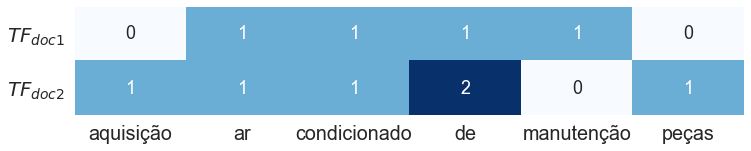

In [3]:
tf_vectorizer = CountVectorizer() # ←------- Aqui está a única alteração em relação à representação 1_hot

tf = tf_vectorizer.fit_transform(corpus).toarray()
vocab = tf_vectorizer.get_feature_names()

visualiza_vetorizacao(tf, vocab, 'TF')

### A representação do tipo *TF-IDF*

Esta representação surgiu como uma proposta para endereçar o seguinte problema: em diversas situações, palavras muito 
frequentes não acrescentam informação alguma a respeito dos documentos nos quais ocorrem. Por outro lado, palavras raras 
podem ser muito úteis em sua caracterização. 

#### Exemplo

Consideremos por exemplo uma base de contratos celebrados por algum órgão da administração pública. Nesta base poderia 
existir uma campo "Descrição do objeto" contendo uma descrição sucinta do objeto dos contratos, como a seguir:

|Nº do contrato| Descrição do objeto                   |
|:-------------|:--------------------------------------|
|01            |"manutenção de ar condicionado"        |
|02            |"contratação de serviço"               |
|03            |"contratação de pintor"                |
|04            |"serviço de hemodiálise"               |
|05            |"contratação de serviço de pintor"     | 
|06            |"aquisição de peças de ar condicionado"|

Reparem que nesta base existem palavras que se repetem com frequencia e não acrescentam informação alguma do domínio 
(educação, saúde, segurança, serviços de manutenção etc.) da contratação do bem ou serviço. Dentre estas palavras 
(descartando aquelas que tem função puramente gramatical, também conhecidas como *stop words*, como "de") podemos 
citar: 'manutenção', 'contratação', 'serviço' e 'aquisição'. Por outro lado, palavras raras como 'homodiálise' podem
ser determinantes para associar um contrato ao seu domínio.

O inverso da frequencia ocorrência de um termo (ou palavra) nos documentos de um *corpus* — *IDF - Inverse Document 
Frequency* — é uma métrica ou representação que penaliza as palavras que aparecem com muita frequencia e bonifica 
aquelas que ocorrem com raridade na base.

Embora existam algumas pequenas variações na sua forma de implementação, a fórmula comumente apresentada nos 
livros-texto para o cálculo da IDF de uma palavra $w$ em relação a um *corpus* é:

$$\text{IDF}_{w} = log\frac{N}{n_w},$$ 

onde $n_w$ é o nº de documentos que contêm a palavra $w$ e $N$ é o nº total de documentos no *corpus*.

O TF-IDF de uma palavra $w$ num documento $d$ de um *corpus* será então calculado por:

$$\text{TF-IDF}_{w,d} = \text{TF}_{w,d} \times \text{IDF}_w$$ 

> **nota**: segundo as fórmulas anteriormente apresentadas, termos muito frequentes que apareçam em todos os
> documentos ($n_w=N$) terão um $\text{IDF}_w=0$ resultando numa penalização máxima para seu $\text{TF-IDF}$. Por
> outro lado, um termo $w$ que ocorra em um único documento terá $\text{IDF}_{w}=logN$, resultando no maior valor 
> possível para $\text{TF-IDF}{w,d} = \text{TF}_{w,d} \times logN$

<br>

#### Exemplo - continuação

No código a seguir iremos redefinir o *corpus* com a descrição dos objetos dos contratos da base fictícia apresentada 
na primeira parte do exemplo.

Na sequência iremos instanciar um objeto da classe `TfidVectorizer` para obtermos uma representação vetorizada, segundo 
o método $\text{TF-IDF}$, dos documentos deste novo *corpus*.  


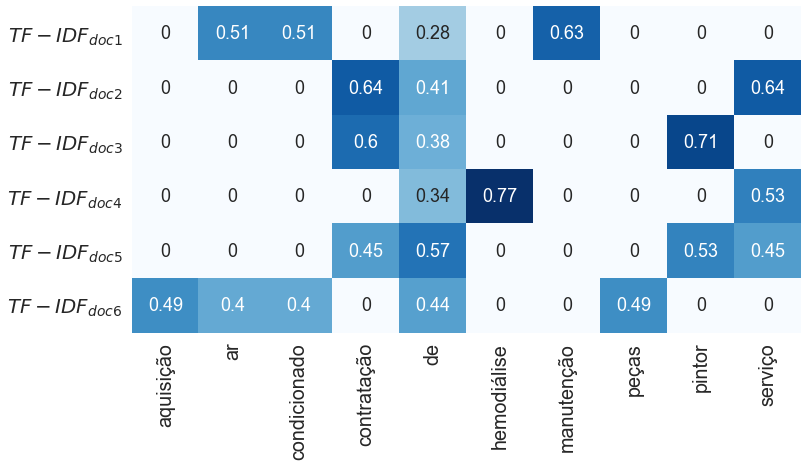

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["manutenção de ar condicionado",
          "contratação de serviço",
          "contratação de pintor",
          "serviço de hemodiálise",
          "contratação de serviço de pintor", 
          "aquisição de peças de ar condicionado"]

tfidf_vectorizer = TfidfVectorizer()

tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
vocab = tfidf_vectorizer.get_feature_names()

visualiza_vetorizacao(tfidf, vocab, 'TF-IDF')

> **nota**: Em modelos baseados em *Deep Learning* não se utiliza representações do tipo 
> $\text{TF}$ ou $\text{TF-IDF}$ uma vez que estes modelos normalmente têm por objetivo 
> aprender uma representação interna mais adequada para o texto. Por outro lado, pode-se 
> utilizar uma codificação inicial do tipo *one-hot* de modo que o índice ativado desta
> representação vetorial seja utilizado como "chave de consulta" para uma camada ou matriz 
> de [embeddings](https://towardsdatascience.com/what-the-heck-is-word-embedding-b30f67f01c81), 
> que fornecerá uma representação vetorial densa que servirá de entrada para o modelo baseado 
> em *Deep Learning*, como no esquema a seguir: ![](./images/one-hot_embedding_model.png).